# Regression and classification - supervised learning
Machine learning is a very broad field and pretty much covers every application in which a bit of software is not explicetly programmed to perform a special task but *learns* to do it by *training* it with example data. This tutorial will only cover one aspect of machine learning: *supervised learning*. 

Supervised learning is always about predicting something based on some underlying data:
    - product interests based on Google searches
    - stock prices based on the market development of the last week
    - the kind of animal we see in an image based on samples we have stored in a data base
    
Machine learning is called *supervised*, if the value that is to be predicted is available for the data that is used for training. If an algorithm is trained to separate images of cats and dogs, the images used for training this are labelled by someone before the training. In the beginning, a machine learning algorithm won't be able to keep them apart, but after it has been *trained* on a lot of data, it can be able to perform this task.

There are many types of algorithms which can be used for supervised learning. Some of them are shown below. In this tutorial, we will focus on one special type of machine learning algorithms: *neural networks*
<img src="https://miro.medium.com/max/477/1*KFQI59Yv7m1f3fwG68KSEA.jpeg" height=500 style='height: 500px'> (image: https://medium.com/technology-nineleaps/popular-machine-learning-algorithms-a574e3835ebb)

## Regression
Regression deals with the prediction of continuous variables based on input data. The simplest form of regression is a function fit with one variable as it is done in the lab exercises a lot:
<img src="https://github.com/flome/e4_bsc_python/blob/machine_learning/4.%20Machine%20Learning/imgs/linear_fit.png?raw=true" height=400 style='height: 400px'>
If we now do a measurement at a new point *x'*, the regression can be used to "predict" the most likely value for *y = f(x')*

### Linear regression
The regression method used above is called *linear regression* for obvious reasons. The regression prediction is determined by a *slope m* and an *intercept b*. In the example below, you can experiment a bit how to match the data well: Adjust the slope and intercept, so that the *manual linear fit* matches the data well. The plot updates as soon as you stop moving the sliders.

In [99]:
# run this code!
linear_example()

#### Loss functions
Turns out, this is really annoying because you don't even know, what "matching the data well" is even suppose to mean! The computer cannot know this either. We need to quantify what "matching the data" means. This is done with *loss* or *cost* functions. A loss function returns a value based on "how well the fit matches the data". For regression, the *least-squares-fit* is the most common way to quantify this. The loss is computed as the average squared difference of the data values $y_i$ from the fit line $f(x_i)$:
<p>
<center>
$\mathrm{m. s. e.} = \frac{1}{N} \sum_{i = 0}^{N} \left( y_i - f(x_i) \right)^2$
</center>
</p>
Try your luck again, this time you get to know "how well you match the data":
The plots are updated when you stop moving the sliders!


In [100]:
# run this code!
linear_example_with_loss()

## Classification
Classification works very similar to regression.

In [ ]:
## 1D classification


In [96]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def linear_example():
    m = widgets.FloatSlider(
        value=0,
        min=-2,
        max=2,
        step=0.05,
        description='slope m:',
        continuous_update=False,
        orientation='horizontal'
    )

    b = widgets.FloatSlider(
        value=0,
        min=-2,
        max=2,
        step=0.05,
        description='intercept b:',
        continuous_update=False,
        orientation='horizontal'
    )
    
    x = np.linspace(-5, 5)
    y = np.random.normal(.6*x+1)
    
    
    out = widgets.interactive_output(lambda m, b: plot_it(x, y, linear, m, b), {'m': m, 'b': b})
    display(widgets.HBox([out, widgets.VBox([m, b])]))
    
def linear_example_with_loss():
    m = widgets.FloatSlider(
        value=0,
        min=-2,
        max=2,
        step=0.05,
        description='slope m:',
        continuous_update=False,
        orientation='horizontal'
    )

    b = widgets.FloatSlider(
        value=0,
        min=-2,
        max=2,
        step=0.05,
        description='intercept b:',
        continuous_update=False,
        orientation='horizontal'
    )
    
    x = np.linspace(-5, 5)
    y = np.random.normal(.6*x+1)
        
    out = widgets.interactive_output(lambda m, b: plot_it(x, y, linear, m, b), {'m': m, 'b': b})
    loss_text = widgets.interactive_output(
        lambda m, b: print(f'm. s. e. loss: {mse(y, linear(x, m, b)):.3f}'), {'m': m, 'b': b}
    )
    loss_plot(None, None, True)
    loss_display = widgets.interactive_output(lambda m, b: loss_plot(y, linear(x, m, b)), {'m': m, 'b': b})
    display(widgets.HBox([widgets.VBox([out, loss_display]), widgets.VBox([m, b, loss_text])]))
    
def plot_it(x, y, f, m, b):
    plt.plot(x, y, '.', label='Measurement data')
    plt.plot(x, f(x, m, b), '--', label='Manual fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    
def loss_plot(y_true, y_pred, reset=False):
    if reset:
        loss_plot.history = {'x':[], 'loss':[]}
        return    
    
    if not hasattr(loss_plot, 'history'):
        loss_plot.history = {'x':[], 'loss':[]}
    
    loss = mse(y_true, y_pred)
    loss_plot.history['x'].append(len(loss_plot.history['x']))
    loss_plot.history['loss'].append(loss)
    
    plt.plot(loss_plot.history['x'], loss_plot.history['loss'], 'o-', label='loss')
    plt.xlabel('iteration')
    plt.ylabel('m. s. e. loss')

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend(loc='best')

def linear(x, m, b):
    return m*x + b

def mse(y_true, y_pred):
    return np.mean( (y_true-y_pred)**2 )

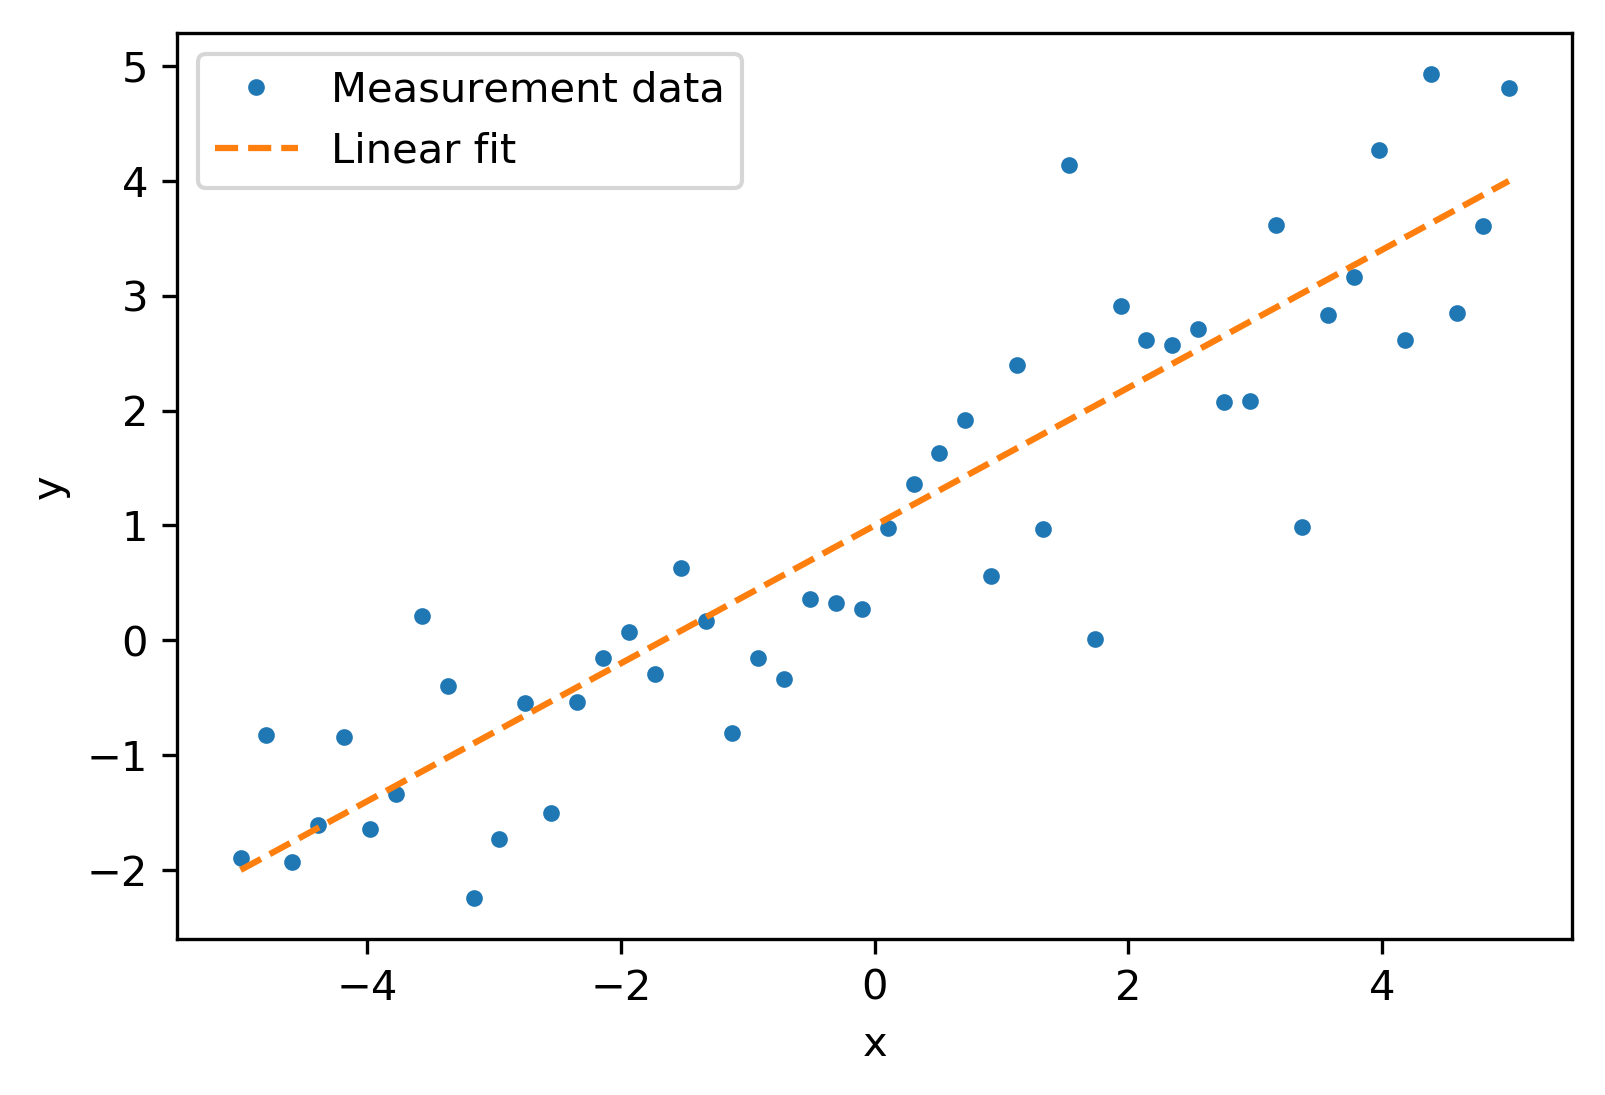

In [8]:

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5)
plt.figure(dpi=300)

plt.plot(x, np.random.normal(.6*x+1), '.', label='Measurement data')
plt.plot(x, .6*x+1, '--', label='Linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.savefig('imgs/linear_fit.png')
